# PROYECTO FINAL INT. MODELOS MATEMÁTICOS DE GESTIÓN FINANCIERA. ESTUDIANTES: 
## LUISA ORTIZ Y NICOLÁS ROBAYO. 2020-2
Este proyecto se puede ejecutar en linea para una mejor visualizacion en 
https://deepnote.com/project/eaa5c835-c2fb-4447-8a50-9bc42318a08a

In [16]:
# Import built-in libs
import math

# Import 3th parties libraries
import seaborn as sns
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
import scipy.stats as st
import pandas as pd
#Inicializa el generador de números aleatorios
rng = np.random.default_rng()


1) Elabore un programa de computadora que simule el comportamiento de un modelo de árbol binomial para precios de activos. Éste debe recibir como parámetros el número de periodos, el factor de valorización, el factor de depreciación, sus respectivas probabilidades y un precio inicial. El programa debe mostrar la evolución del precio del activo en los diferentes periodos.

Para este punto, se determinan los parámetros iniciales del árbol de manera arbitraria. En primer lugar se desarrolló un módulo en el que se crea un camino binario aleatorio de tamaño N. Esta simulación es utilizada posteriormente para crear todos los caminos posibles del árbol y determinar el precio de sus nodos, condicionado claro, a los factores de valorización y descuento y los caminos que lleven a dicho nodo. Estos módulos se encuentran adaptados para que el usuario ingrese los parámetros escogidos y obtenga una gráfica del precio del activo y una tabla tipo matriz, en donde se avanza horizontalmente cuando ocurre una valorización y se avanza verticalmente hacia abajo cuando se trata de una depreciación. Se puede ver claramente el ejemplo seleccionado de N=12 con un precio inicial de 100, avanzando hasta el último periodo, donde se tienen 13 posibles precios finales.

In [158]:
N = 12 # Número de periodos
d, p  = 1.07, 0.4 # Factor de Valoración, Probabilidad de valoración
u = 0.95 # Factor de depreciación
q = 1 - p # Probabilidad de depreciación
P0 = 100 # Precio Inicial
simulaciones = 100

In [157]:
def arbol_binomial(N, d, u, p, q, P0):
    caminos = rng.choice([d,u], size = N, p = [p,q])
    caminos = np.insert(np.cumprod(caminos),0,1)
    return caminos*P0 

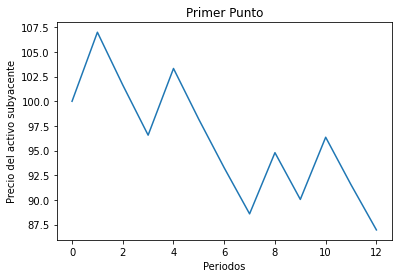

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,100.000000,95.000000,90.250000,85.737500,81.450625,77.378094,73.509189,69.833730,66.342043,63.024941,59.873694,56.880009,54.036009
1,0.000000,107.000000,101.650000,96.567500,91.739125,87.152169,82.794560,78.654832,74.722091,70.985986,67.436687,64.064852,60.861610
2,0.000000,0.000000,114.490000,108.765500,103.327225,98.160864,93.252821,88.590180,84.160671,79.952637,75.955005,72.157255,68.549392
3,0.000000,0.000000,0.000000,122.504300,116.379085,110.560131,105.032124,99.780518,94.791492,90.051917,85.549322,81.271856,77.208263
4,0.000000,0.000000,0.000000,0.000000,131.079601,124.525621,118.299340,112.384373,106.765154,101.426897,96.355552,91.537774,86.960885
5,0.000000,0.000000,0.000000,0.000000,0.000000,140.255173,133.242414,126.580294,120.251279,114.238715,108.526779,103.100440,97.945418
6,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,150.073035,142.569383,135.440914,128.668869,122.235425,116.123654,110.317471
7,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,160.578148,152.549240,144.921778,137.675689,130.791905,124.252310
8,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,171.818618,163.227687,155.066303,147.312988,139.947338
9,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,183.845921,174.653625,165.920944,157.624897


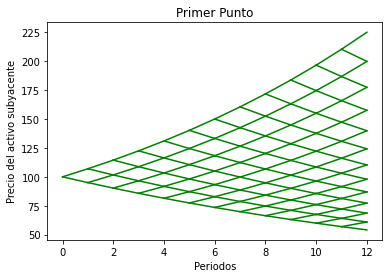

In [223]:
#Simulación
simulacion_arbol = arbol_binomial(N, d, u, p, q, P0)
plt.title("Primer Punto") 
plt.xlabel("Periodos") 
plt.ylabel("Precio del activo subyacente") 
plt.plot(np.arange(N+1),simulacion_arbol) 
plt.show()

#Todos los caminos 
plt.title("Primer Punto") 
plt.xlabel("Periodos") 
plt.ylabel("Precio del activo subyacente") 
stock = np.zeros([N + 1, N + 1])
for i in range(N + 1):
    for j in range(i + 1):
        stock[j, i] = P0 * (u ** (i - j)) * (d ** j)
        if j >0 and i !=0:
            plt.plot([i-1,i],[stock[j-1, i-1], stock[j, i] ], color ="green") 
        if j < i and i !=0:
            plt.plot([i-1,i],[stock[j, i-1], stock[j, i] ], color ="green") 

stockdf=pd.DataFrame(stock)

stockdf.style.apply(background_gradient,
               cmap='terrain',
               m=pandasdf.min().min(),
               M=pandasdf.max().max(),
               low=0,
               high=2).set_caption('Matriz de valores del arbol binomial.')

En la gráfica llamada 'Punto 1' se puede ver de manera más gráfica la estructura del árbol según los valores que toma en cada nodo. Como se puede ver, en el periodo 12 se cuenta con los 13 nodos que se esperaban. Cabe resaltar la visibilidad de diversos caminos binarios aleatorios para llegar a cada nodo. 

2) Elabore un programa como el anterior, de manera que el usuario introduzca la tasa de interés y los factores de valorización y depreciación. Con ellos el computador debe realizar la simulación empleando la probabilidad de riesgo neutral del modelo. Evidentemente su programa debe rechazar datos que no correspondan a la condición de no arbitraje.

Teniendo en cuenta la condición de no artitraje, se tiene un módulo que admite como parámetros r, d, u, P0 y un camino aleatorio específico, con el fin de calcular las probabilidades de riesgo neutral. En principio se tiene la probabilidad p tilda y se verifica que no sea ni mayor a 1 ni menor a cero, puesto que esto constituiría una situación de artitraje y el sistema arrojaría un mensaje de error. Incluyendo la funcionalidad del punto anterior se genera un código que ejecute la simulación del árbol bajo riesgo neutral. En resumen, se creó un módulo en donde el usuario introduce los parámetros solicitados y obtiene como resultado el árbol con las condiciones mencionada, esto se puede observar en forma de gráfica posteriormente. Igualmente, se tiene en cuenta que para efectos de este trabajo, se tiene un N=12. 

In [114]:

def arbol_riesgo_neutral(r,d,u, P0, caminos):

    p = (1 + r - d) / (u - d)
    if p>1 or p<0: raise SystemExit('Viola condición de no arbitraje')
    q = 1 - p
    
    caminos = np.insert(np.cumprod(caminos),0,1)
    return caminos*P0 



[100.          95.          90.25        85.7375      81.450625
  87.15216875  82.79456031  78.6548323   74.72209068  70.98598615
  67.43668684  64.0648525   60.86160987]


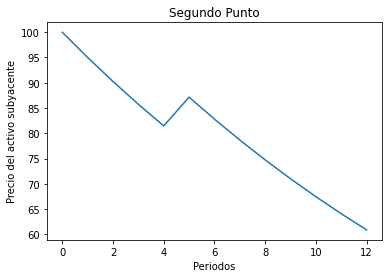

In [138]:
r = 0.01 #risk free interest rate per annum
u, d = u, d # Factores de valoración y depreciación
P0 = P0 # Precio inicial
caminos = rng.choice([d,u], size = N, p = [p,q])

#Simulación
simulacion_arbol = arbol_riesgo_neutral(r,d,u,P0, caminos)
print (simulacion_arbol)
plt.title("Segundo Punto") 
plt.xlabel("Periodos") 
plt.ylabel("Precio del activo subyacente") 
plt.plot(np.arange(N+1),simulacion_arbol) 
plt.show()

3) Elabore un programa de computadora que simule un camino aleatorio simétrico $M_n$ , luego utilícelo para simular la evolución de precios dada por la fórmula: 

$$S_n = e^{\sigma M_{n}}\left(\frac{2}{e^\sigma + e^{-\sigma}}\right)^n$$

Dado que para este literal se quiere tener simetría en el camino aleatorio se fijan las probabilidades de depreciación y valorización en 0.5 cada una. Posterirormente, se utiliza la fórmula presentada en el enunciado para calcular los precios en cada periodo. De manera similar a los literales anteriores se presenta la gráfica que muestra la evolución de los precios del derivado financiero a lo largo de los periodos.

In [ ]:
def camino_simetrico(sigma, N):
    M = np.random.choice([-1, 1], size=N, p=[0.5, 0.5])
    M = np.insert(M, 0,0)
    n = np.arange(0, N+1)
    S = np.exp(sigma * M)*(2/(np.exp(sigma)+np.exp(-sigma)))**n
    return S


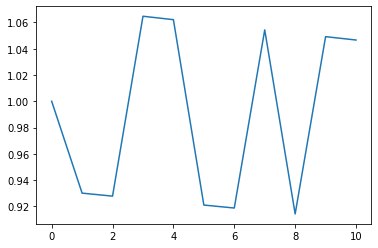

In [ ]:
N = N
sigma = 0.07
camino = camino_simetrico(sigma, N)
plt.plot(camino)

4)  Repita el ejercicio anterior para un caso general que admita caminos aleatorios no simétricos (deriva hacia arriba y hacia abajo) donde el usuario debe dar las probabilidades de ascenso y
descenso.

De manera similar al punto anterior se presenta el módulo que tiene como salida la gráfica de la evolución del precio del activo, solo que se programa una simulación en donde se genera una elección aleatoria entre dos probabilidades, las cuales son diferentes y además suman 1. A continuación se muestra el código y el resultado de la gráfica mencionada anteriormente. 

In [ ]:
def camino_no_simetrico(sigma, p,q, N):
    M = np.random.choice([1, -1], size=N, p=[p, q])
    M = np.insert(M, 0,0)
    n = np.arange(0, N+1)
    S = np.exp(sigma * M)*(2/(np.exp(sigma)+np.exp(-sigma)))**n
    return S

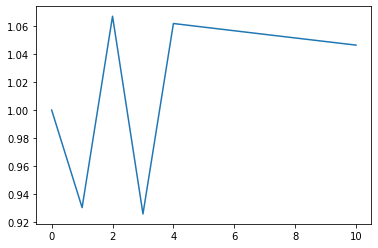

In [ ]:
p = 0.76
q = 1 - p 
N = N
sigma = 0.07
camino = camino_no_simetrico(sigma, p, q, N)
plt.plot(camino)

5) Utilizando los algoritmos anteriores proponga un módulo que le permita simular tiempos de parada para modelos binomiales con periodos finitos y tiempos de alcance para valores prefijados en modelos basados en caminos aleatorios.

Teniendo en cuenta los parámetros del modelo se tiene como output del módulo una gráfica en donde se ve claramente la diferencia entre el modelo con periodos finitos y tiempos de alcance. Se fija el parámetro Tau en 8 y se observa el efecto gráficamente. Por medio de este módulo se puede identificar visualmente que se puede simular este tipo de elementos computacionalmente con resultados muy interesantes.

In [294]:
def tiempo_parada(Tau, precio_activo):
    precio_activo[Tau:] = precio_activo[Tau]
    return precio_activo
def tiempo_alcance(precio_alcanzado, precio_activo):
    tiempo_alcance = np.argmax(precio_activo>=precio_alcanzado)
    if tiempo_alcance == 0:
        return None
    else:
        return tiempo_alcance
    
    

<function tiempo_alcance at 0x7fa4022aacb0>


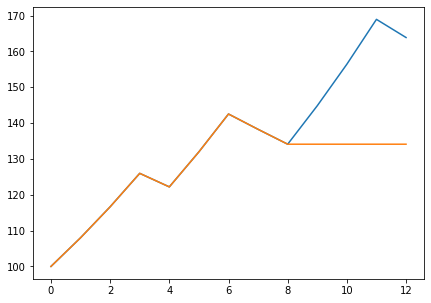

In [332]:
Tau = 5 #Tiempo de parada Entre 0, N
precio_alcanzado = 1000
simulacion_arbol = arbol_riesgo_neutral(r,d,u,P0, caminos)
tiempo_alcance(precio_alcanzado, simulacion_arbol)
plt.plot(simulacion_arbol)
simulacion_parada = tiempo_parada(8,simulacion_arbol)
plt.plot(simulacion_parada)

6) Realice más de 10 simulaciones para cada caso y describa sus observaciones. En especial describa las diferencias observadas entre los modelos del punto 1) y del punto 3).

Por medio de las gráficas resultantes de las simulaciones, se puede observar que ambas mantienen un comportamiento exponencial. No obstante, se ve que el árbol bajo riesgo neutral crece de manera más lenta. Este efecto se da por el hecho de que no se está generando valor con el activo, sino solo se está manteniendo el valor del dinero en el tiempo. Esto se puede comprobar en el punto 10 de este informe, pues al traer a valor presente su precio, debe ser igual al incial. Se debe tener en cuenta entonces que entre más volatilidad, hay más posibilidad de que el precio del activo aumente, de allí la pendiente mayor cuando las probabilidades no son de riesgo neutral.

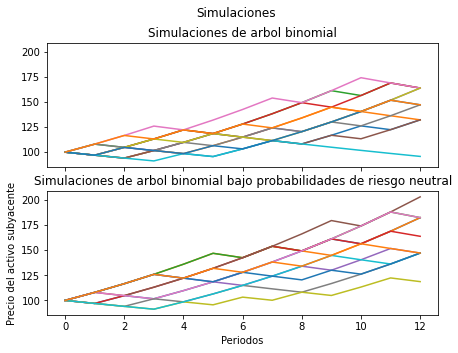

In [333]:
N = 12
d = 1.08
u = 0.97
p = 0.6
q = 1 - p
P0 = 100
r = 0.02
#plt.figure(num=None, figsize=(18, 6), dpi=200, facecolor='w', edgecolor='k')
fig, (ax1, ax2) = plt.subplots(2, sharex=True, sharey=True)
plt.rcParams["figure.figsize"] = (7,5)
fig.suptitle('Simulaciones')
plt.title("Simulaciones de arbol binomial") 
plt.xlabel("Periodos") 
plt.ylabel("Precio del activo subyacente") 
ax1.set_title("Simulaciones de arbol binomial")
for i in range(12):
    camino = arbol_binomial(N, d, u, p, q, P0)
    ax1.plot(camino)

ax2.set_title("Simulaciones de arbol binomial bajo probabilidades de riesgo neutral")
for i in range(12):
    caminos = rng.choice([d,u], size = N, p = [p,q])
    camino_bajo_riesgo = arbol_riesgo_neutral(r,d,u,P0, caminos) 
    ax2.plot(camino_bajo_riesgo)



7) Desarrolle un módulo que le permita al usuario introducir una gestión del portafolio tipo delta para visualizar procesos de capitalización regidos por la fórmula $X_{n+1}= \Delta _n S_{n+1}+(1+r)(X_n-\Delta_nS_n)$ . En otras palabras, realice un algoritmo que (con base en la simulación para la serie de precios $S_n$ ) le permita al usuario ingresar las operaciones $\Delta_n$ para obtener la serie de capital acumulado $X_n$. Su algoritmo debe permitirle al usuario saber cuándo debe apalancar recursos, en otras palabras debe alertar aquellas situaciones en que $X_n-\Delta_nS_n<0$

Para este punto se debe analizar muy bien la fórmula presentada y observar que realmente delta n determina la gestión del portafolio, no solo en términos de capitalización sino en términos de apalancamiento financiero. Por ejemplo, por medio de la estratégia que se opte, se podría llegar a un modelo de auto-financiación, en donde sea relevante hacer un trade de pérdidas y ganancias, por encima de la cantidad de capital que se inyecte al portafolio. 
En cuanto al módulo, se tiene que la línea verde de la gráfica muestra la serie de capital acumulado, mientras que en barras rojas se muestran lo periodos en lo que el portador del portafolio deba apalacarse financieramente. 

In [392]:
def proceso_capitalizacion(r, capital_inicial, gestion, precio_activo):
    capital = np.empty(N+1)
    apalancado = np.zeros(N)
    capital[0] = capital_inicial
    for n in range(0,N):
        if capital[n] - gestion[n]*precio_activo[n]<0:
            apalancado[n] = gestion[n]*precio_activo[n]
        capital[n+1] = gestion[n]*precio_activo[n+1] + (1+r)*(capital[n]-gestion[n]*precio_activo[n])
    return capital, apalancado

In [356]:
capital

array([500.        , 510.92772508, 545.37415472, 562.77195047,
       542.7444395 , 589.37846919, 607.30279629, 609.112015  ,
       599.82284441, 632.12451575, 656.43585244, 689.37153167])

La gestión a utilizar es  [2.77653643 1.58781481 5.19825597 0.57542833 2.07060806 5.44186778
 5.31327349 2.10872457 3.06617021 5.16869816 1.24501881 4.10267599]
[500.         496.11731784 515.28074642 558.26051905 566.17050833
 591.12844721 641.65128403 620.47712614 619.79484679 654.34868814
 633.81882168 638.6406109  681.54123935]


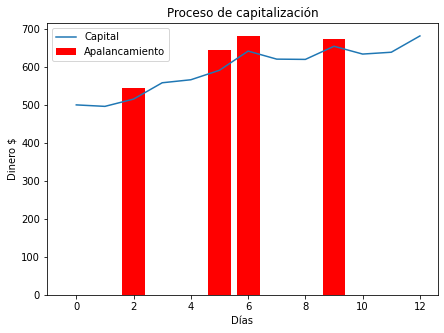

In [357]:
capital_inicial = 500
Maximo_a_invertir = 6
r = 0.02
gestion = np.random.random_sample((N,)) * Maximo_a_invertir
print("La gestión a utilizar es " , gestion)
caminos = rng.choice([d,u], size = N, p = [p,q])
precio_activo = arbol_riesgo_neutral(r,d,u,P0,caminos)
capital, apalancado = proceso_capitalizacion(r, capital_inicial, gestion, precio_activo)
fig, ax = plt.subplots()
line, = ax.plot(capital, label = "Capital")
plt.title("Proceso de capitalización") 
plt.xlabel("Días") 
plt.ylabel("Dinero $") 
bar = ax.bar(np.arange(N), apalancado, color= "r", label = "Apalancamiento")
ax.legend()
print(capital)

8)Elabore un módulo que reciba la función de pagos de un derivado tipo europeo $V_N = V_N(\omega_1,...,\omega_N)$, los parámetros de un modelo binomial y que devuelva la valoración del derivado en los periodos intermedios $n=0,...,N-1$

Usaremos una función Call Europea con precio strike $100 sobre el activo del punto 1. Teniendo en cuenta el tipo de activo, se escoge un vector VN, el cual representa la función de pagos en los nodos del último periodo del árbol. El módulo consisite en tomar estos valores e iterar regresiva y recursivamente el árbol, asignando los valores de Vn para cada nodo teniendo en cuenta los valores de los periodos futuros. Para estos cálculos se hace uso de las probabilidades de riesgo neutral, puesto que se debe ponderar el resultado potencial de si el periodo futuro será de valorización o depreciación. Es por esto que se opta por la construcción de una matriz, similar a la del Punto 1, en la que se tiene que a medida que haya una valorización se avanza una celda hacia la derecha y en caso de una depreciación se tendrá un desplazamiento vertical hacia abajo, de esta manera es relativamente sencillo referenciar las posiciones para el cálculo pertienende del Vn.

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,14.653890,10.277728,6.655593,3.851838,1.886124,0.702997,0.151868,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,19.323131,14.105417,9.592459,5.894589,3.106974,1.268186,0.306772,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,24.927308,18.900484,13.482178,8.800095,5.007902,2.254964,0.619680,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000,31.452677,24.696800,18.433905,12.768290,7.860998,3.935346,1.251754,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.000000,38.837608,31.453630,24.468199,17.930948,11.943869,6.697645,2.528544,0.000000,0.000000
5,0.000000,0.000000,0.000000,0.000000,0.000000,46.998339,39.068133,31.494814,24.276645,17.428970,11.000699,5.107659,0.000000
6,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,55.868512,47.422815,39.342880,31.609854,24.205820,17.113753,10.317471
7,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,65.431579,56.451206,47.862763,39.646084,31.782004,24.252310
8,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,75.720584,66.168672,57.036698,48.303087,39.947338
9,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,86.786906,76.624020,66.911043,57.624897


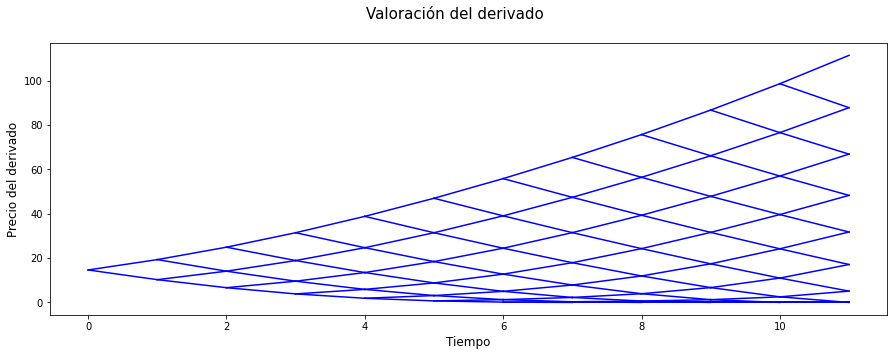

In [358]:
N= 12

def proceso_valoracion_n (VN, u,d,r, N):

    #Se crea la matriz
    matriz = np.empty([N+1, N+1 ])
    #Se asignan los pagos del último periodo
    for i in range(0,N+1):
        matriz[i,N]=VN[i]
        
    #Se asignan valores de los parámetros
    u=u
    d=d
    r=r
    ptilda=(1+r-d)/(u-d)
    qtilda=(u-1-r)/(u-d)
    listaFilas=[]
    listaColumnas=[]

    for i in range(0,N+1):
        listaFilas.append(i)

    for i in range(0,N):
        listaColumnas.append(i)

    for j in listaColumnas[::-1]:
        for i in range(0,j+1):

            matriz[i,j]=(ptilda*matriz[i,j+1]+qtilda*matriz[i+1,j+1])/(1+r)
    return pd.DataFrame(matriz)


#La Función de Pagos V_N
VN = np.maximum( np.flip(stockdf[N])-100, np.full(N+1, 0))
matrizr=proceso_valoracion_n(VN = VN, d=1.07,u=0.95, r=0.01,N=12 )

pandasdf=pd.DataFrame(matrizr)

def background_gradient(s, m, M, cmap='PuBu', low=0, high=0):
    rng = M - m
    norm = mpl.colors.Normalize(m - (rng * low),
                            M + (rng * high))
    normed = norm(s.values)
    c = [mpl.colors.rgb2hex(x) for x in (plt.cm.get_cmap(cmap)(normed))]
    return ['background-color: %s' % color for color in c]


fig = plt.figure(figsize= (15, 5))
fig.suptitle('Valoración del derivado', fontsize=15)
plt.xlabel('Tiempo', fontsize=12)
plt.ylabel('Precio del derivado', fontsize=12)

for periodo in range(1, N):
    #for pisos 
    for piso in range(periodo+1):
        precio = pandasdf.loc[piso, periodo]
        if piso >0 and periodo !=0:
            pass
            plt.plot([periodo-1,periodo],[pandasdf.loc[piso-1, periodo-1], pandasdf.loc[piso, periodo] ], color ="blue") 
        if piso < periodo and periodo !=0:
            plt.plot([periodo-1,periodo],[pandasdf.loc[piso, periodo-1], pandasdf.loc[piso, periodo] ], color ="blue") 




pandasdf.style.apply(background_gradient,
               cmap='terrain',
               m=pandasdf.min().min(),
               M=pandasdf.max().max(),
               low=0,
               high=2).set_caption('Proceso de Valoración de la opción Europea Call')


Se observa la matriz de la que se habló, la cual está con colores degradados según los valores que se tienen. por otro lado, se ve también el árbol con sus Vn respectivos en forma de gráfica.

9) Complete el punto anterior para que el módulo correspondiente proporcione al usuario la operación delta que replica el derivado en cuestión. Esta es:
$$
\Delta_n(\omega_1,...,\omega_N) = \frac{V_{n+1}(\omega_1,...,\omega_nu) - V_{n+1}(\omega_1,...,\omega_nd) }{S_{n+1}(\omega_1,...,\omega_nu) - S_{n+1}(\omega_1,...,\omega_nd)}
$$
Introduzca estos datos en el punto 7 para verificar que efectivamente replica el derivado.

Como se mencionaba en puntos pasados, el delta proporciona la posibilidad de replicación. Por medio de la valoración de manera recursiva-regresiva, se llega a construir una estrategia de capitalización, esto se demuestra en el libro del curso y da como resultado la formula aplicada en este punto del trabajo. Teniendo esto en cuenta, la ejecución del proceso teniendo en cuenta las deltas calculadas con el Vn y el Sn, deben replicar el comportamiento del árbol bajo riesgo neutral. Es decir, se puede construir una estrategia de auto-financiamiento que replique el comportamiento de los pagos de la opción. Se debe tener en cuenta también, que con el fin de evitar arbitraje, el costo de replica debe ser igual al valor de la opción, pues de lo contrario se estaría generando valor con la maniobra. Además se tiene que el valor en cada nodo debe ser igual bajo las dos estratégias, por lo antes explicado. De esta manera es evidente que se puede llegar de un punto a otro por medio de este procedimiento.
A continuación se muestra el módulo que recibe como parámetro las funciones halladas anteriormente como continuación del punto anterior y devuelve, tanto el cálculo de deltas, como la comprobación de replicación en cuestión.

Este método retorna una matriz de deltas el cual dependiendo el camino replicará la valoración del derivado.

Al utilizar los datos generados en el punto 7 podemos ver que se replica el derivado hasta un grado de similitud, probablemente algun error en el rounding de los datos hace que las series no sea exactas.

In [359]:
N=12
def deltas(valoraciones,precios):
    deltas = np.full_like(precios, 0)
    for periodo in range(deltas.shape[0]-1):
        for piso in range(periodo+1):
            deltas[piso, periodo] = (valoraciones.loc[ piso+1, periodo +1] -  valoraciones.loc[piso, periodo +1])/ \
                                    (precios.loc[piso+1, periodo +1] -  precios.loc[piso, periodo +1])


    
    return deltas

#La Función de Pagos V_N
VN = np.maximum( np.flip(stockdf[N])-100, np.full(N+1, 0))
matrizr=proceso_valoracion_n(VN = VN, d=1.07,u=0.95, r=0.01,N=12 )
matrix_deltas = pd.DataFrame(deltas(matrizr, stockdf))
matrix_deltas

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.753784,0.653493,0.530067,0.389606,0.245954,0.120223,0.034777,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
1,0.000000,0.842826,0.763078,0.654774,0.517148,0.357585,0.196087,0.065654,0.000000,0.000000,0.000000,0.000000,0.0
2,0.000000,0.000000,0.913631,0.859235,0.776966,0.658816,0.500971,0.311892,0.123945,0.000000,0.000000,0.000000,0.0
3,0.000000,0.000000,0.000000,0.961926,0.932278,0.881866,0.798958,0.668845,0.478760,0.233989,0.000000,0.000000,0.0
4,0.000000,0.000000,0.000000,0.000000,0.988249,0.977037,0.955476,0.914479,0.837611,0.696081,0.441737,0.000000,0.0
5,0.000000,0.000000,0.000000,0.000000,0.000000,0.998203,0.996179,0.991876,0.982726,0.963270,0.921899,0.833934,0.0
6,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0
7,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0
8,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.0
9,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.0


In [360]:
deltas_camino = [float(matrix_deltas.loc[0,0])]
deltas_camino

[0.7537836234028606]

0 1.07
1 0.95
2 0.95
3 0.95
4 1.07
5 0.95
6 1.07
7 0.95
8 0.95
9 0.95
10 1.07


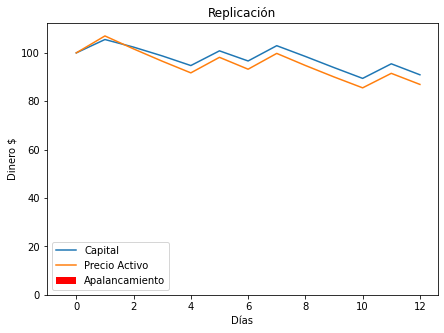

In [412]:
u = 1.07
d = 0.95
p=(1+r-d)/(u-d)
q=(u-1-r)/(u-d)
#Simulación
caminos = rng.choice([d,u], size = N, p = [p,q])
#La Función de Pagos V_N
VN = np.maximum( np.flip(stockdf[N])-100, np.full(N+1, 0))
precio_activo = arbol_riesgo_neutral(r,d,u,P0, caminos)
matrizr = proceso_valoracion_n(VN = VN, d=1.07,u=0.95, r=0.01,N=12 )
matrix_deltas = pd.DataFrame(deltas(matrizr, stockdf))
deltas_camino = [float(matrix_deltas.loc[0,0])]
piso = 0
for tiempo, paso in enumerate(caminos[:N-1]):
    
    print(tiempo, paso)
    if paso == u:
        deltas_camino.append(matrix_deltas.loc[piso, tiempo+1 ]               )
    else:
        
        deltas_camino.append(matrix_deltas.loc[piso+1, tiempo +1]               )
        piso +=1

#Punto7 
capital, apalancado= proceso_capitalizacion(0.01, 100, deltas_camino, precio_activo)
fig, ax = plt.subplots()
line, = ax.plot(capital, label = "Capital")
plt.title("Replicación") 
plt.xlabel("Días") 
plt.ylabel("Dinero $") 
bar = ax.bar(np.arange(N), apalancado, color= "r", label = "Apalancamiento")

ax.plot(precio_activo, label = "Precio Activo")
ax.legend()



In [402]:
stockdf

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,100.0,95.0,90.25,85.7375,81.450625,77.378094,73.509189,69.833730,66.342043,63.024941,59.873694,56.880009,54.036009
1,0.0,107.0,101.65,96.5675,91.739125,87.152169,82.794560,78.654832,74.722091,70.985986,67.436687,64.064852,60.861610
2,0.0,0.0,114.49,108.7655,103.327225,98.160864,93.252821,88.590180,84.160671,79.952637,75.955005,72.157255,68.549392
3,0.0,0.0,0.00,122.5043,116.379085,110.560131,105.032124,99.780518,94.791492,90.051917,85.549322,81.271856,77.208263
4,0.0,0.0,0.00,0.0000,131.079601,124.525621,118.299340,112.384373,106.765154,101.426897,96.355552,91.537774,86.960885
5,0.0,0.0,0.00,0.0000,0.000000,140.255173,133.242414,126.580294,120.251279,114.238715,108.526779,103.100440,97.945418
6,0.0,0.0,0.00,0.0000,0.000000,0.000000,150.073035,142.569383,135.440914,128.668869,122.235425,116.123654,110.317471
7,0.0,0.0,0.00,0.0000,0.000000,0.000000,0.000000,160.578148,152.549240,144.921778,137.675689,130.791905,124.252310
8,0.0,0.0,0.00,0.0000,0.000000,0.000000,0.000000,0.000000,171.818618,163.227687,155.066303,147.312988,139.947338
9,0.0,0.0,0.00,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,183.845921,174.653625,165.920944,157.624897


10) Utilice estadística descriptiva sobre varias simulaciones con los resultados del punto 1) para mostrar que $\frac{S_n}{(1+r)^n}$ es una martingala.

Para este punto se tiene que para una martingala, el valor presente de sus precios según el camino debe ser igual al precio incial 
propuesto. Por lo que se procede a ejecutar 1000 simulaciones de caminos aleatorios binarios con longitud N. Esto con el fin de 
determianar un grado de constacia entre algunos de los valores frente al valor presente mencionado.
Dado que se quiere hallar el valor esperado, sería pertinente hacer uso de las pribabilidades de riesgo neutral, 
sin embargo al ser una martingala, se puede establecer que dicho procedimiento es equivalente a llevar a cabo el descuento de
la expresión del enunciado a valor presente.

Vemos en la gráfica que el valor esperado de cada periodo se aproxima a 100, el cual es el valor inicial por lo que para cada periodo su valor esperado es igual al del periodo pasado. Esto comprueba que la formula $\frac{S_n}{(1+r)^n}$ es una martingala.

Text(0, 0.5, 'Dinero $')

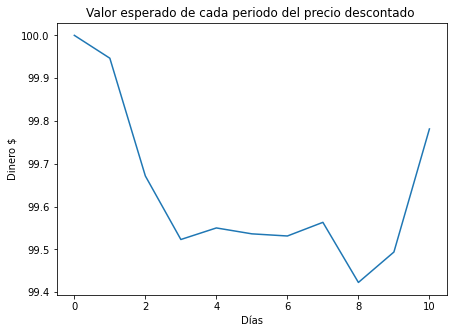

In [434]:
N = 10 # Número de periodos
d, p  = 0.95, 0.4 # Factor de depreciacion, Probabilidad de depreciacion
u = 1.07 # Factor de valoracion
q = 1 - p # Probabilidad de depreciación
P0 = 100 # Precio Inicial
r=0.01
 
p=(1+r-d)/(u-d)
q=(u-1-r)/(u-d)

simulacion = arbol_binomial(N, d, u, p, q, P0)

simulaciones = [simulacion/((1+r)**np.arange(N+1))]
for i in range(1000):
    simulacion = arbol_binomial(N, d, u, p, q, P0)

    descontado = simulacion/((1+r)**np.arange(N+1))

    simulaciones = np.concatenate((simulaciones, [descontado]), axis = 0)
plt.plot(np.mean(simulaciones, axis =0))
    
plt.title("Valor esperado de cada periodo del precio descontado ") 
plt.xlabel("Días") 
plt.ylabel("Dinero $") 